<a href="https://colab.research.google.com/github/Valiev-Koyiljon/MLBasics/blob/main/KNN_and_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##KNN and SVM lab

###Part1

In [ ]:
# necessary libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline







In [ ]:
# data loading
from google.colab import files
upload =files.upload()



Saving diabetes.csv to diabetes.csv


In [ ]:
# data loading
df = pd.read_csv("diabetes.csv")
df.sample(5)



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
181,0,119,64,18,92,34.9,0.725,23,0
271,2,108,62,32,56,25.2,0.128,21,0
31,3,158,76,36,245,31.6,0.851,28,1
441,2,83,66,23,50,32.2,0.497,22,0


In [ ]:
# data cleaning
df.replace([np.inf, -np.inf], np.nan, inplace =True)
df.replace([np.nan], 0, inplace =True)

# separate the input and output features
X = df
Y = df["Outcome"]
X.drop("Outcome", axis = 1, inplace = True)
X = pd.DataFrame(X)


# Data normalization

ms = MinMaxScaler()
X = ms.fit_transform(X)



###Part2

In [ ]:
# split the data into train and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state = 42)


#importing the ml algorithms
from sklearn.neighbors import KNeighborsClassifier

# define and train the model
model = KNeighborsClassifier(n_neighbors=5, metric = "minkowski", p = 2)
model.fit(Xtrain, ytrain)





KNeighborsClassifier()

In [ ]:
# predicting using test data
pred = model.predict(Xtest)

#evaluate the confusion matrix :

mat = classification_report(ytest, pred)
print(mat)

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       151
           1       0.54      0.49      0.51        80

    accuracy                           0.68       231
   macro avg       0.64      0.63      0.64       231
weighted avg       0.67      0.68      0.68       231



Text(95.72222222222221, 0.5, 'Actual')

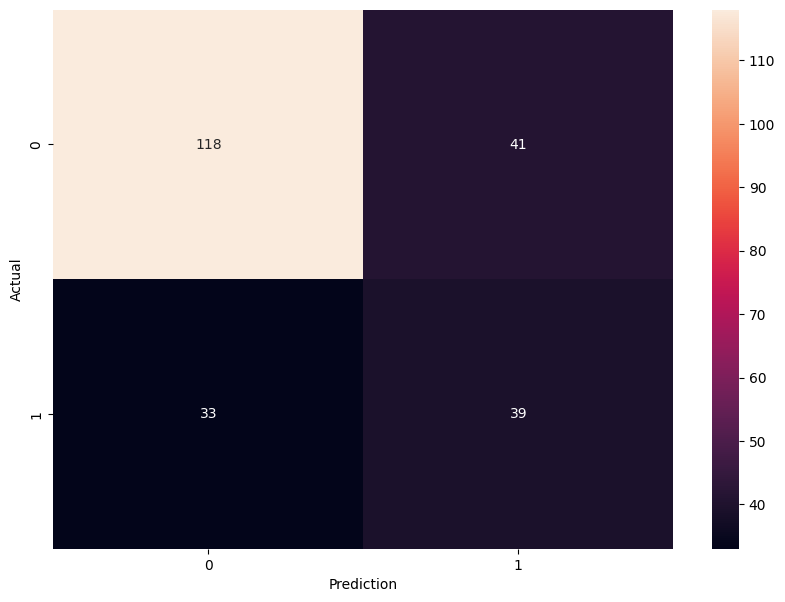

In [ ]:
# see confusion matrix
cm = confusion_matrix(pred, ytest)

# plot the confusion matrix table

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Prediction")
plt.ylabel("Actual")

##Observations

In [ ]:
observations = [5, 115, 65, 25, 170, 27.5, 0.514, 30]

observations =pd.DataFrame(observations)
print(observations.shape)

observations = observations.transpose()
observations = ms.fit_transform(observations)
predictions = model.predict(observations)
print("predictions: ", predictions)

(8, 1)
predictions:  [0]


###Support Vector Machine (SVM)

In [ ]:
# necessary libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline







In [ ]:
# data loading
from google.colab import files
upload = files.upload()


Saving iris.csv to iris (1).csv


In [ ]:

# data loading
df = pd.read_csv("iris.csv")
df.sample(5)

# data cleaning
df.replace([np.inf, -np.inf], np.nan, inplace =True)
df.replace([np.nan], 0, inplace =True)

In [ ]:
# separate the input and output features
X = df
Y = df["variety"]
X.drop("variety", axis = 1, inplace = True)
# X = pd.DataFrame(X)


#labelling output
le = LabelEncoder()
Y = le.fit_transform(Y)


# Data normalization

ms = MinMaxScaler()
X = ms.fit_transform(X)


##Part2

In [ ]:
# split the dataset into train and test data


# split the data into train and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state = 42)


#importing the ml algorithms
from sklearn.svm import SVC

# define and train the model
model = SVC()
model.fit(Xtrain, ytrain)

# predicting using test data
pred = model.predict(Xtest)

#evaluate the confusion matrix :

mat = classification_report(ytest, pred)
print(mat)



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Text(95.72222222222221, 0.5, 'Actual')

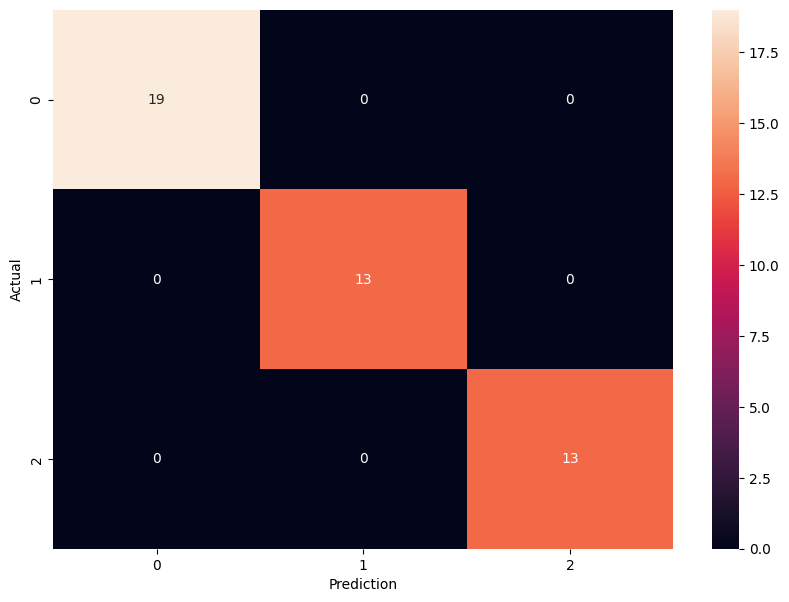

In [ ]:
# see confusion matrix
cm = confusion_matrix(pred, ytest)

# plot the confusion matrix table

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Prediction")
plt.ylabel("Actual")

##Observations for SVM.SVC

In [ ]:
observations = [3.5, 2.7, 1.7, 0.2]


observations = pd.DataFrame(observations)
print(observations.shape)

observations =observations.transpose()
observations = ms.fit_transform(observations)
predictions = model.predict(observations)
print("The predicted class of the new observation is : class: ", predictions)

(4, 1)
The predicted class of the new observation is : class:  [0]
